In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from mmdew.bucket_stream2 import BucketStream
import tqdm

In [3]:
sample_size = 50000
# Assuming you've already defined the BucketStream class.
bs = BucketStream(1, 1e-22)  
X = np.random.normal(0, 1, sample_size).reshape(-1,1)

# List to store times.
times = []

for i in tqdm.tqdm(range(sample_size)):
    start_time = time.time()
    bs.insert_no_cut(X[i])
    end_time = time.time()
    times.append(end_time - start_time)




100%|██████████| 50000/50000 [12:54<00:00, 64.52it/s] 


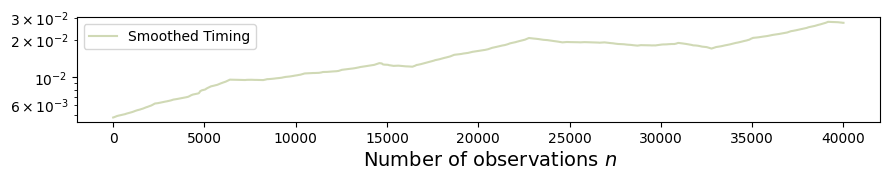

In [8]:
import seaborn as sns
from sklearn import linear_model

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
smooth_times = moving_average(times, 10000)
with sns.cubehelix_palette(8, start=0.5, rot=-0.75, gamma=1.2):
    fig, ax2 = plt.subplots(figsize=(9,2))
    
    sns.lineplot(x=np.arange(len(smooth_times)), y=smooth_times, ax=ax2, label="Smoothed Timing")
    ax2.set_ylabel("")
    ax2.set_xlabel("")
    ax2.set_yscale("log")
    fig.supxlabel("Number of observations $n$", va="top", y=0.22, x=0.55, fontsize=14)

    plt.tight_layout()
    plt.savefig("./smoothed_runtime.pdf", bbox_inches="tight")

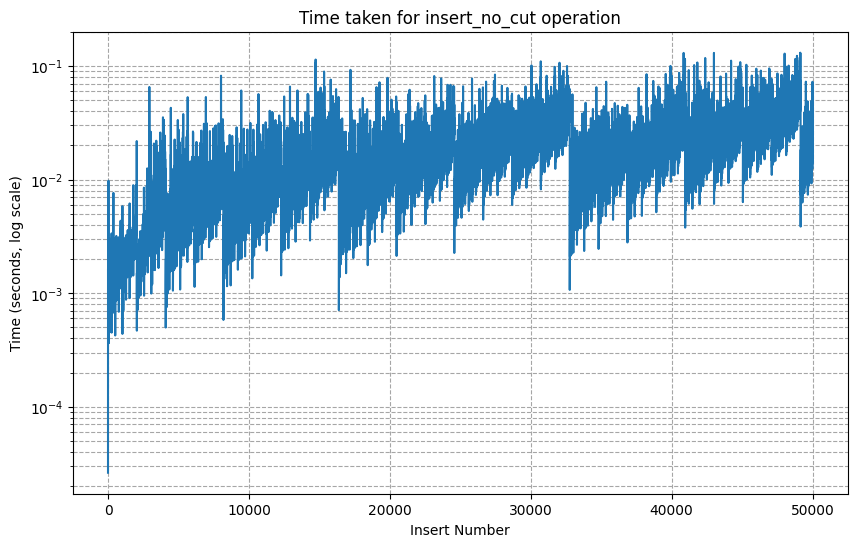

In [4]:
# Plot the results on a logarithmic y-axis.
plt.figure(figsize=(10, 6))
plt.plot(times)
plt.yscale('log')
plt.title('Time taken for insert_no_cut operation')
plt.xlabel('Insert Number')
plt.ylabel('Time (seconds, log scale)')
plt.grid(True, which="both", ls="--", c='0.65')
plt.show()

In [ ]:
import seaborn as sns
with sns.cubehelix_palette(8, start=0.5, rot=-0.75, gamma=1.2):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(9,2))
    for alg in algs:
        sns.lineplot(data=df[df["algorithm"] == alg], x="dataset", y="perinsert", ax=ax1, label=alg, markersize=7, marker=next(markercycler), ls=next(linecycler))
    ax1.set_yscale("log")
    ax1.set_xlabel("Number of observations ($t$)")
    ax1.set_ylabel("$s$ / Insert")
    #ax1.legend(bbox_to_anchor=(0.1, 2), ncol=7)
    ax1.set_xlim((0,1000000))
    Line, Label = ax1.get_legend_handles_labels()
    ax1.get_legend().remove()
    fig.legend(Line, Label, loc="upper center", bbox_to_anchor=(0.49, 1.17), ncol=8)

    sns.lineplot(data=mmdaw, x="dataset", y="perinsert", label="MMDEW", ax=ax2, ls=next(linecycler), marker="^", markersize=7)
    sns.lineplot(x=X.reshape(len(X)), y=y1, label="Linear fit $\\log^2 t$", ax=ax2, ls=next(linecycler), marker=">", markersize=7)
    #ax2.set_xlabel("Number of observations $t$")
    ax2.set_ylabel("")
    ax1.set_xlabel("")
    ax2.set_xlabel("")
    fig.supxlabel("Number of observations $t$",va="top",y=0.22,x=0.55,fontsize=14)
    #ax2.legend(bbox_to_anchor=(0.5, 1.15+.4), ncol=2)
    #ax2.set_xlim((0,1000000))

    plt.tight_layout()
    plt.savefig("../article/figures/runtime.pdf", bbox_inches="tight")